# Introducción a Keras: Implementando una RNA para regresión

## Conjunto de datos

### Descripción

Este conjunto de datos contiene información recopilada por el Servicio de Censos de los EE.UU. sobre las viviendas en el área de Boston Mass. Se obtuvo del archivo StatLib (http://lib.stat.cmu.edu/datasets/boston), y se ha utilizado extensamente en toda la literatura para comparar diferentes algoritmos de Machine Learning.

Los datos fueron publicados originalmente por Harrison, D. y Rubinfeld, D.L. Precios hedónicos y la demanda de aire limpio', J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Características del conjunto de datos

El conjunto de datos es pequeño, con sólo 506 casos. Contiene 14 características que se describen a continuación:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 dollars
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in 1000 dollars

**El objetivo de nuestro problema de regresión es utilizar las 13 primeras características para predecir el valor de MEDV (que representa el precio de la vivienda).**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0. Imports

In [2]:
import tensorflow as tf



In [3]:
from tensorflow import keras


## 1. Definicion del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos

In [4]:
from tensorflow.keras import datasets

In [5]:
boston_housing = datasets.boston_housing

In [6]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train.shape

(404, 13)

In [8]:
X_test.shape

(102, 13)

In [9]:
boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [10]:
y_train.shape

(404,)

In [11]:
y_train[0:4]

array([15.2, 42.3, 50. , 21.1])

### 1.2. Visualizando el conjunto de datos

In [12]:
import pandas as pd
import numpy as np

In [13]:
np.__version__

'1.26.4'

In [14]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [15]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [16]:
X_test.shape

(51, 13)

In [17]:
X_val.shape

(51, 13)

## 2. Definicion de la arquitectura de la Red Neuronal Artificial

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:
* La primera capa estará formada por 30 neuronas
* La segunda capa estará formada por 10 neuronas
* La última capa estará formada por 1 neurona

In [19]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Una vez hemos definido la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método *summary()*

In [20]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2. Acceso a los elementos definidos de la RNA

In [21]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [22]:
hidden1 = network.layers[1]

In [23]:
weights, biases = hidden1.get_weights()

Como puede observarse en las siguientes celdas, Keras automáticamente inicializa el valor de los parámetros de manera aleatoria y los bias term con el valor 0

In [24]:
weights

array([[ 0.19659019, -0.14057173, -0.15169628,  0.2691477 ,  0.1473943 ,
        -0.15035182,  0.00785133, -0.31480032, -0.07612327,  0.24689138],
       [ 0.3703388 ,  0.26817894,  0.14274573, -0.11548817, -0.19725187,
        -0.04068276, -0.04125711, -0.19478568, -0.37790802,  0.06440672],
       [-0.05083159,  0.02624711,  0.11995667, -0.36246938,  0.36014777,
        -0.21776935, -0.24448915,  0.2380594 ,  0.2716666 , -0.25158763],
       [ 0.0718416 ,  0.3579623 ,  0.24902022, -0.09284136, -0.2062445 ,
        -0.09002483,  0.13300389,  0.00501052, -0.01121718,  0.11758417],
       [ 0.3529384 , -0.00089458, -0.22370869, -0.21227296,  0.00964546,
         0.2717747 , -0.3403321 , -0.32955223,  0.27646732,  0.06280261],
       [-0.00526452,  0.21896595, -0.35236758,  0.14363736,  0.24945867,
         0.14359695, -0.31030422, -0.14652723, -0.10266504,  0.36626774],
       [ 0.01241961,  0.11224502,  0.14393944,  0.3641855 , -0.271964  ,
        -0.18738654,  0.24818957, -0.13357076

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 3. Configuracion de la Red Neuronal Artificial

In [26]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')

## 4. Preparacion del conjunto de datos

Debido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetros de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos

### 4.1. Preparación de las características de entrada

In [27]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

## 5. Entrenamiento de la Red Neuronal Artificial

En este punto ya estamos listos para entrenar nuestra Red Neuronal Artificial invocando el método *fit()*. Una de las capacidades que nos proporciona Keras es la de integrar el proceso de validación en el propio proceso de entrenamiento, para ello, junto con el subconjunto de datos de entrenamiento, debemos proporcionarle a este método el subconjunto de validación.

In [28]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=5,
                      validation_data=(X_val_prep, y_val))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 641.5195 - val_loss: 542.8102
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 402.4219 - val_loss: 58.6867
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 115.4005 - val_loss: 153.7535
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108.2909 - val_loss: 65.5053
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.8992 - val_loss: 51.0699


En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

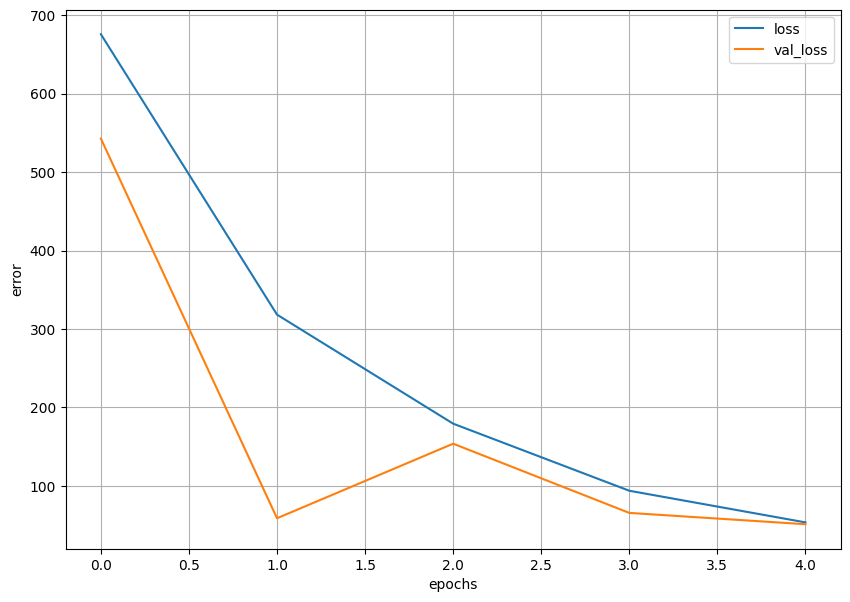

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

## 6. Validación con el conjunto de datos de pruebas

In [30]:
test_loss = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.5140 


In [31]:
print('test_mse:', test_loss)

test_mse: 33.652374267578125


In [32]:
print('test_rmse:', pow(test_loss,1/2))

test_rmse: 5.801066649123946


## 7. Predicción de nuevos ejemplos

In [33]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[23]

In [34]:
# Representación gráfica del nuevo ejemplo que queremos predecir
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_new = pd.DataFrame([X_new], columns=features[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05


In [35]:
# Preprocesamos el nuevo ejemplo que queremos predecir
X_new_prep = scaler.transform(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [36]:
# Relizamos la prediccion
y_predict = network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [37]:
y_predict

array([[23.973904]], dtype=float32)

In [38]:
y_predict.round(2)

array([[23.97]], dtype=float32)

In [39]:
# Comparamos la predicción con el valor original
print("Predicción:", y_predict.round(2))
print("Valor original:", y_test[23])

Predicción: [[23.97]]
Valor original: 33.0


## 8. Guardar el modelo en disco

Con Keras generamos la arquitectura de la red neuronal, la entrenamos y después la evaluamos. Existen diferentes alternativas a la hora de exportar el modelo entrenado (https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models), en este caso se expone una de las más utilizadas.

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes componentes de la red neuronal:
* La arquitectura del modelo
* Los parámetros del modelo
* Los hiperparámetros del modelo
* Las métricas

In [40]:
# Guardamos el modelo en disco
network.save("modelo_boston_housing.h5")